In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import pandas as pd
import serial

import glob

import time
import os
import shutil
import sys
from datetime import datetime
print(sys.version)
print(sys.executable)

3.6.5 | packaged by conda-forge | (default, Apr  6 2018, 13:44:09) 
[GCC 4.2.1 Compatible Apple LLVM 6.1.0 (clang-602.0.53)]
/Users/cswitzer/anaconda/envs/nectarLearn/bin/python


In [2]:
# list ports

def serial_ports():
    """ Lists serial port names

        :raises EnvironmentError:
            On unsupported or unknown platforms
        :returns:
            A list of the serial ports available on the system
    """
    if sys.platform.startswith('win'):
        ports = ['COM%s' % (i + 1) for i in range(256)]
    elif sys.platform.startswith('linux') or sys.platform.startswith('cygwin'):
        # this excludes your current terminal "/dev/tty"
        ports = glob.glob('/dev/tty[A-Za-z]*')
    elif sys.platform.startswith('darwin'):
        ports = glob.glob('/dev/tty.*')
    else:
        raise EnvironmentError('Unsupported platform')

    result = []
    for port in ports:
        try:
            s = serial.Serial(port)
            s.close()
            result.append(port)
        except (OSError, serial.SerialException):
            pass
    return result


# I'm using COM3 and COM5 arduinos
# COM4 is for the arduino controlling the cameras
serial_ports()

['/dev/tty.Bluetooth-Incoming-Port', '/dev/tty.usbmodem1411']

In [3]:
# connect 
PORT1 = "/dev/tty.usbmodem1411"
connected1 = False
if "ser1" in globals():
    ser1.close()
ser1 = serial.Serial(PORT1,9600, timeout=1.0) # stop if no data comes in 1 second
while not connected1:
    serin1 = ser1.read()
    connected1 = True
    print("connected to arduino on " + PORT1)
str(ser1.readline().decode("UTF-8"))    

connected to arduino on /dev/tty.usbmodem1411


' Setup complete\r\n'

In [4]:
for ii in range(3): 
    written = ser1.write("f".encode("utf-8"))


In [5]:
for ii in range(10): 
    written = ser1.write("b".encode("utf-8"))

In [6]:
"c".encode("utf-8")
int.from_bytes(b'c', byteorder='big') # this is what the arduino will see

99

In [7]:
int.from_bytes(b'c', byteorder='big')

99

In [8]:
def calibration:
    # put liquid to top of tube
    

SyntaxError: invalid syntax (<ipython-input-8-e527d897335e>, line 1)

In [9]:
def readData(serial_con, readlen = 5, wait_time = 0):
    tmp = []
    for ii in range(readlen):
        serial_con.write("r".encode("utf-8"))
        txt = serial_con.readline().decode("UTF-8")
        values = [int(i) for i in txt.split(',')]
        tmp.append(values)
        time.sleep(wait_time)
    return(np.array(tmp))
    

In [10]:
tt = readData(ser1, 100, 0.1)

In [11]:
# top sensor
tt[:, 2]

# mid sensor
tt[:, 1]

# base sensor
tt[:, 0]

array([146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146,
       146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146,
       146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146,
       146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146,
       146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146,
       146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146,
       146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146,
       146, 146, 146, 146, 146, 146, 146, 146, 146])

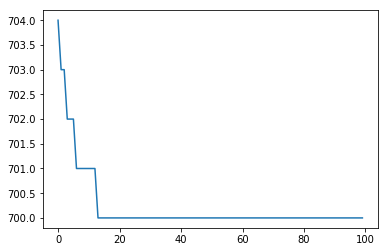

In [12]:
plt.plot(tt[:,2])

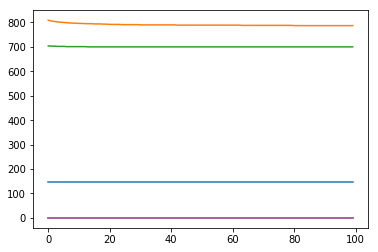

In [13]:
plt.plot(tt)

In [14]:
#ser1.close()

In [43]:
def moveToTop(serial_con, cutoff = 650):
    # refref: may want to go 1 or two more moves forward after cutoff is passed --- 
    ## the cutoff is the meniscus
    [[topVal, bottomLim, topLim]] = readData(serial_con, 1, 0)[:, [1,3,4]]
    print(topVal)
    while (topVal > cutoff) and not topLim:
        #move forward
        ser1.write("f".encode("utf-8"))
        
        # read data again
        [[topVal, bottomLim, topLim]] = readData(serial_con, 1, 0)[:,[1,3,4]]
        # rror if limit switch is hit
        if topLim:
            raise RuntimeError('Hit upper limit switch')
        
        
        
        

In [44]:
# refref: problem -- liquid stays stuck on the sides -- may need to move back slower

def moveBack(serial_con, cutoff = 650):
    
    [[topVal, bottomLim, topLim]] = readData(serial_con, 1, 0)[:, [1,3,4]]
    
    
    while (topVal < cutoff) and not bottomLim:
        #move backward
        for jj in range(7):
            ser1.write("b".encode("utf-8"))
            time.sleep(0.3)
        
        # read data again
        [[topVal, bottomLim, topLim]] = readData(serial_con, 1, 0)[:, [1,3,4]]
        # rror if limit switch is hit
        if bottomLim:
            raise RuntimeError('Hit lower limit switch')

In [50]:
readData(ser1, 1, 0)

array([[146, 249, 376,   0,   0]])

In [51]:
moveToTop(ser1)
readData(ser1, 1, 0)

250


array([[146, 250, 375,   0,   0]])

In [48]:
moveBack(ser1)
readData(ser1, 1, 0)

array([[145, 786, 377,   0,   0]])

In [83]:
ser1.write("f".encode("utf-8"))

1

In [ ]:
[[vals, bottomLim, topLim]] = readData(ser1, 1, 0)[:, 2:]

In [ ]:
readData(ser1, 1, 0)[:, 2:]

In [ ]:
toplim = 1

In [ ]:
not toplim